# Multilayer Perceptron

### Importacion de librerias

In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

2024-07-15 11:15:01.973690: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-15 11:15:01.978423: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-15 11:15:01.992056: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-15 11:15:02.012319: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-15 11:15:02.017885: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-15 11:15:02.032316: I tensorflow/core/platform/cpu_feature_gu

In [4]:
tf.__version__

'2.17.0'

## I. Preprocesamiento de datos

### Importación del dataset

In [5]:
dataset = pd.read_csv('dataset.csv')
#dataset
num_entries = len(dataset)  # Number of rows
attributes = (dataset.columns)  # Number of columns
num_entries

num_entries, attributes

(2523,
 Index(['mediaBT', 'mediaRX', 'varBT', 'varRX', 'medialat', 'varlat', 'Open',
        'Close', 'mediadift', 'varDifT', 'Attack'],
       dtype='object'))

In [7]:
#descripcion
import seaborn as sns
dataset.describe(include='all')

#describe function from seaborn generates statistics of a dataset
# count = num of non null values for each column
# mean = average value
# std = standard deviation, is the measure of the dispersion of data
# min 
# 25% = first quartile, it's the value above which the 25% of data falls
# 50% = median, same of 25% but for 50%
# 75% = third quartile
# max


#the library helps for 
# Central tendency: mean and median helps to understan the typical values
# Spread: is the dispersion, indicated by std and the range (difference between max and min)
# Outliers: they can affect the values. Indentifiable with statistical measures like Z-scores
# Skewness: measures the asymmetry of the distribution (positive-right, negative-left) = 3(mean-median)/std
# Shape of data distribution: histograms, kernel density plots or box plots
# 
# To reduce the impact of outliers is possible to transform data, truncate (assigning a min-max value)
# or remove them
#

,mediaBT,mediaRX,varBT,varRX,medialat,varlat,Open,Close,mediadift,varDifT,Attack
count,2523.000000,2523.00000,2523.000000,2.523000e+03,2.523000e+03,2.523000e+03,2523.000000,2523.000000,2523.000000,2.523000e+03,2523.000000
mean,1.057108,37.13132,20.293733,1.864801e+04,2.226580e+04,2.180900e+08,287.816885,289.993262,1.803668,2.486395e+02,0.417757
std,6.965186,480.15860,493.697543,4.403825e+05,9.096487e+04,2.254029e+09,437.345249,464.203045,6.529043,9.454564e+03,0.493287
min,0.000000,0.00000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,0.000000,0.00000,0.000000,0.000000e+00,2.177250e+00,0.000000e+00,1.000000,1.000000,0.000285,2.165000e-07,0.000000
50%,0.000000,0.00000,0.000000,0.000000e+00,6.357411e+01,1.690000e-04,4.000000,2.000000,0.127459,1.758552e-03,0.000000
75%,0.000000,1.00000,0.000000,0.000000e+00,2.837760e+02,1.615842e+03,898.000000,899.500000,0.776259,1.298520e-01,1.000000
max,256.000000,19643.00000,21421.250000,2.005696e+07,2.379253e+06,7.523205e+10,1107.000000,4083.000000,216.090295,4.665939e+05,1.000000


<Axes: >

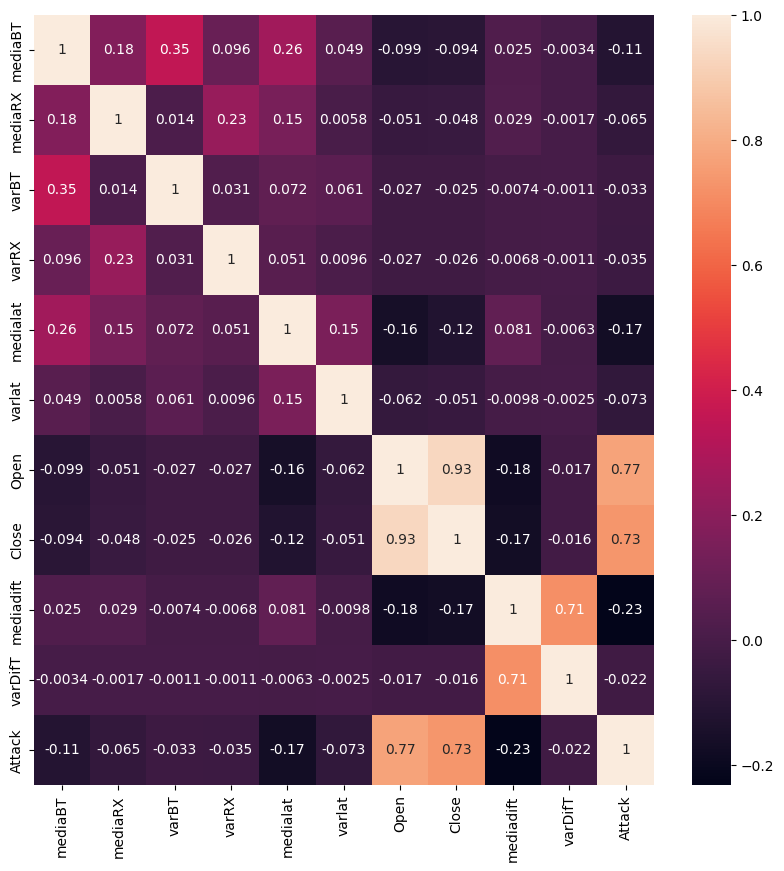

In [8]:
#plot para ver la correlacion entre las variables del entrenamiento
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(dataset.corr(), annot=True)

#heatmap of the correlation matrix of the dataset
#it is a plot that represents pairs of variables, in which each cell is the correlation of the 2 variables.
#the color of the cell indicates the tempereature, which is the strenght and direction of the correlation
#Correlation is a statistical measure that quantifies the strenght and direction of a linear relationship between 2 variables
#Positive correlation (direct proportionality), negative correlation (inverse proportionality), no correlation (zero value) means no linear relationship
# since it is a normalized value it is independent of the variable's scale
# it's used to understand the relationship between variables, to choose potential predictors for a target variable
# to detect multicollinearity (independent variables highly correlated), that can affect the model stability. To solve the problem it is possible to combine them in a single variable, or use regularization techniques to penalize large coefficients
# Regularization is useful to avoid ovefitting and improve the generalization ability of a model.
# Overfitting is when a model is trained to well with the dataset and doesn't handle unseen data (usually happens with too complex or flexible model)

  

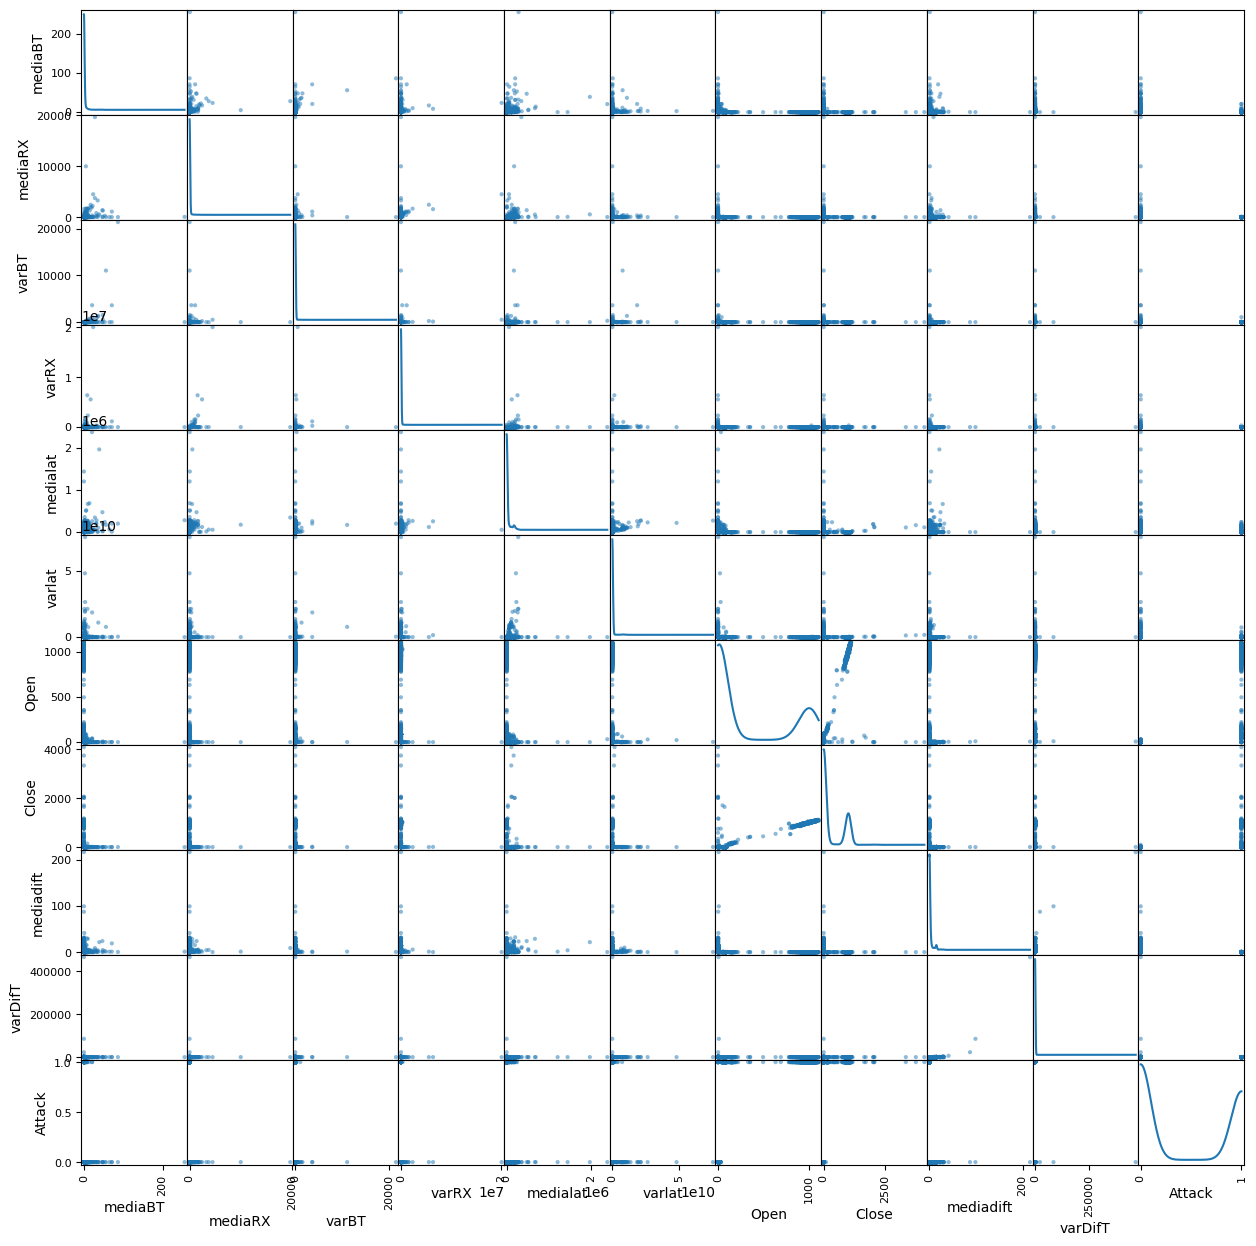

In [10]:
#plot para ver las variables continuas/ discretas
from pandas.plotting import scatter_matrix
scatter_matrix(dataset, figsize = (15, 15), diagonal = 'kde');


#the scatter matrix with a kernel density estimate on the diagonal
#A scatter plot is a plot composed by the representation of a variable against another (the distribuition of data points on a 2-dimensional plane).
#The kde estimates the probability of getting a value.
#The patterns are useful for visually assessing patterns, trends or relationships between two variables (correlation positive line or negative line, outliers)


In [11]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

#X is selection all the attributes except the target variable (which is the last)
#Y takes just the target value

In [12]:
print(X.shape) 

#shape indicates now many rows and column there are

(2523, 10)


In [13]:
print(y)

[0 0 0 ... 0 0 0]


### División del dataset en conjuntos de entrenamiento y prueba

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

#code used to split the dataset in a 20% of test and 80% of training with a seed of 0 in order to obtain always the same result and allow the output to be reproduceable
 

### Feature Scaling

In [17]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#Standardization or normalization is a common preprocessing step to make the features to have mean of 0 and std of 1, resulting in benefit for dinstance-based calculation or gradient descent optimization
#moreover it makes it easier to compare the importance of diffenrent features. In this way the data areprepared to help the model work better

# The methods used are the fitting and transformation:
# fitting computes the mean and std of the each feature (used just in the training set)
# the transform standardize the features subtracting the mean and dividing by std (used in the training set and in the test set) 
# the reason why the fitting is performed only with the training set is because we want the testing set transformationto be consistent with the training set. Infact it uses the same mean and std of the training.
# of course the mean and std in case we want to use the model outside need to be loaded too.
#   X_train_scaled = scaler.fit_transform(X_train)

#   # Save the scaler
#   joblib.dump(scaler, 'scaler_model.pkl')

#   # ...

#   # During deployment or testing
#   # Load the scaler
#   loaded_scaler = joblib.load('scaler_model.pkl')

#   # Use the loaded scaler to transform new data
#   X_new_scaled = loaded_scaler.transform(X_new)

In [18]:
from joblib import dump
dump(sc, 'std_scaler.bin', compress=True)

['std_scaler.bin']

## II. Definición de la arquitectura MLP

In [19]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=6, activation='relu'))
model.add(tf.keras.layers.Dense(units=6, activation='relu'))
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

#creation of a sequential model, which is a model in whcih layers are added one by one in a linear fashion
#dense layers represent a fully connecred layer where each neuron is connected to every neuron in the previous layer. The number of neuron chosed in the units.
# the activation function chosed are the ReLU and the sigmoid (which has been chosed for the output layer)
# it is possible to see the architeture of the model with "model.summary()"


#Tensor Flow(tf) = is an opensource machine learning framework developed by google
#Keras = is a high-level neural network API. Allows the definition of a neural netwoek using a modular approach
#Sequential model = is a type of neural network architecture in which layers are added sequentially in which the output of a layer is the input of the other
#                   suitable only for feedforward network (data flows in only one direction from input to output)
#Activation function = is a mathematical function applied to the output of a neuron and it introduces non-linearity to the network allowing to learn complex patterns and relationships in data.
#ReLU = is an activation function defined as f(x) = max(0,x). It helps in overcoming the vanishing gradient problem (that can slow down or prevent the training of deep networks)
#Sigmoid = is an act. funct. defined as f(x) = 1/(1+ exp(-x)). Commonly used for binary classification, in fact is used as last layer.
#

## III. Entrenamiento del MLP

### Compilación del MLP

In [20]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy']) #learning rate????

#optimizer = specifies the optimization algo used during the training. DEterminates how the model's weights are updated based on the gradients
#            the ADAM stands for Adaptive Moment Estimation. Automatically adapts the learning rate based on the gradients of the paramenters, which helps in converging faster
#            The learning rate is customizable. Usually  it determines the step size at which the model's weights are updated during the training
# Higher learning rate speed up convergence but could also lead to optimization rpoblems
#loss function = quantifies how well the model's predictions match the true labels in the training data. The aim of the model is minimize the value of the loss function, indicating a prediction as close as possible to the true labels.
#                Binary crossentropy measures the disallignment between the binary labels and the predicted ones.
#metrics = are humane readble quantities that helps interpreting the model's performance
#          acc stands for accuracy and measures the percentage of correctly classified instances


### Entrenamiento del MLP en el Training set

In [21]:
history = model.fit(X_train, y_train, batch_size = 100, epochs = 200)

#the fit method is used to train the neural network model.
#batch size = the number of samples processed before the model's parameters are updated (number of training examples used in one onteraction).
#epochs = the number of times the entire dataset is passed forward and backward
#during each epoch data is divided into batches and the model's parameters are updated based on the gradient computed from the loss function.


Epoch 1/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5596 - loss: 0.7207
Epoch 2/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5852 - loss: 0.6735 
Epoch 3/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5954 - loss: 0.6395 
Epoch 4/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5974 - loss: 0.5962 
Epoch 5/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5947 - loss: 0.5770 
Epoch 6/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8617 - loss: 0.5547 
Epoch 7/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8692 - loss: 0.5300 
Epoch 8/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8683 - loss: 0.5084 
Epoch 9/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8547 - loss: 0.5050 
Epoch 10/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8655 - loss: 0.4900 
Epoch 11/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8625 - loss: 0.4816 
Epoch 12/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step -

In [22]:
model.summary()

#provides a textual summary of the model's acrhitecture, including the type of each layer, their shape, the number of parameters
#the output tells everything about what already defined


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 6)              │            66 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │            42 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             7 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 347 (1.36 KB)

 Trainable params: 115 (460.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 232 (932.00 B)

dict_keys(['accuracy', 'loss'])


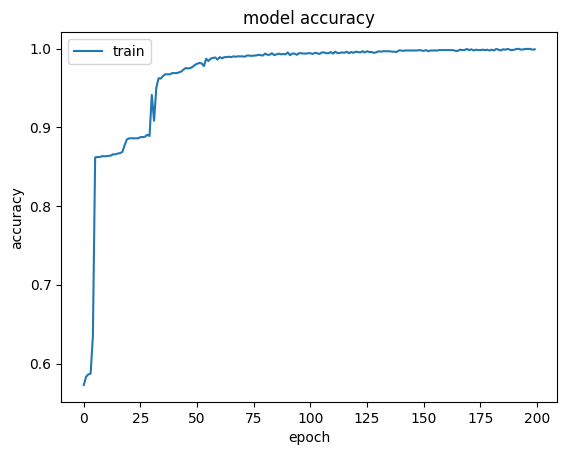

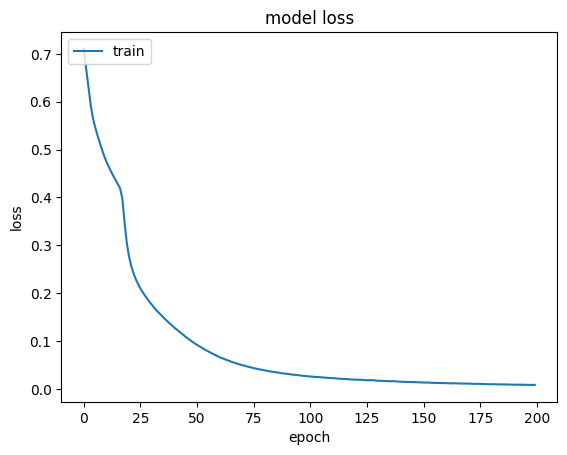

In [39]:
print(history.history.keys())
#  "Accuracy"
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

#Using the fit method a "history" object is returned. It contains a record of the training metrics (like loss and accuracy)at each epoch 
#history.history.keys() prints the key of the dictionary stored in the object history. The keys are simply the metrics stored.

#the first plot is about the training accuracy over epoch

#the second plot is about the training loss over epochs

## IV. Predicciones y evaluación del modelo 

### Predeción de nuevos resultados (los ejemplos de test que has puesto en el notebook)

In [24]:
print(model.predict(sc.transform([['0.0', '0.0', '0.0', '0.0', '0.028499999999999998', '0.00027225', '0', '2', '8.328765946499997', '69.36600139499883']])) >0.5)
#deberia ser falso (no ataque)

#if the prediction is higher than 0.5 then is an attack

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
[[False]]


In [25]:
print(model.predict(sc.transform([['0.0', '0.0', '0.0', '0.0', '0.022', '0.0001', '0', '2', '15.00212264949997', '225.05853661176673']])) >0.5)

#deberia ser falso (no ataque)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
[[False]]


In [26]:
print(model.predict(sc.transform([['1.0', '3.0', '0.0', '0.0', '171105.151', '0.0', '0', '1', '22.652548496', '0.0']]))>0.5)

#deberia ser falso (no ataque)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
[[False]]


In [27]:
print(model.predict(sc.transform([['0','0','0','0','84.54626762','2847.118438', '886', '909', '0.000279018', '3.40E-07']])) > 0.5)
#deberia ser verdadero, presente en el dataset

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
[[ True]]


In [28]:
print(model.predict(sc.transform([['0','0','0','0','29661.68829','290288630.6','50','1704','0.001032548','3.19E-05']]))>0.5)
#deberia ser verdadero, presente en el dataset

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
[[ True]]


In [29]:
print(model.predict(sc.transform([['0','0','0','0','36.169','0','86','1','0.03456421','6.06E-05']]))>0.5)
#deberia ser verdadero, presente en el dataset

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
[[ True]]


### Predicción del Test set

In [30]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

#at first we have the prediction for each entry of the test.
# then it get simply put one result close to the other

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 978us/step
[[1 1]
 [1 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [1 1]]


### Metricas + matriz de confusión

In [31]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score 
cm = confusion_matrix(y_test, y_pred)
print(cm)
print( 'accuracy=', accuracy_score(y_test, y_pred))
print('precision =', precision_score(y_test, y_pred))
print('recall = ', recall_score(y_test, y_pred))
print('F1-score=', f1_score(y_test, y_pred))
print ('AUC_ROC score =', roc_auc_score(y_test, y_pred))

#now it's time to evaluate the model
#confusion matrix = table with TP, FN, FP TN
#accuracy score = compares the predicted labels with the true labels
#precision = ratio of positive right predictions over all positive predictions 
#recall = aka sensivity or true prositive rate, ratio of positive right over all predictions
#F1-score = is the harmonic mean of precision and recall
#AUC_ROC score = area under the receiver operating characteristic curve. It is the ability of
#                the model to distinguish positive and negative classes across different thresholds. 
#                Higher means better performance


[[294   0]
 [  3 208]]
accuracy= 0.994059405940594
precision = 1.0
recall =  0.985781990521327
F1-score= 0.9928400954653938
AUC_ROC score = 0.9928909952606635


<Axes: >

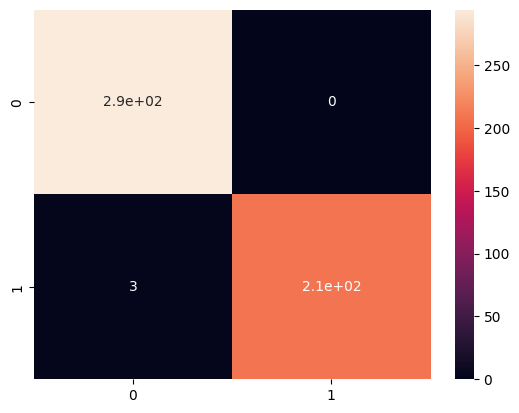

In [32]:
import seaborn as sns
sns.heatmap(cm, annot=True)

# is to see the heatmap of the confusion matri

<Axes: >

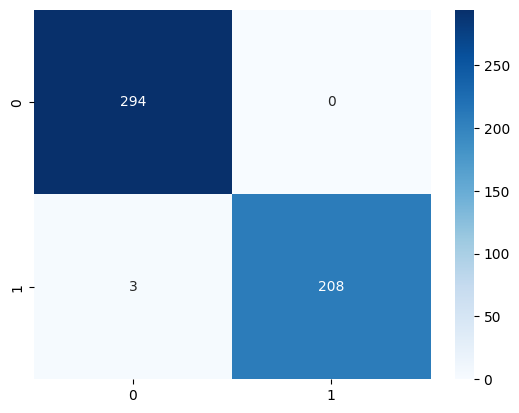

In [33]:
import seaborn as sns
sns.heatmap(cm, annot=True,fmt='g', cmap='Blues')

#ftm = specifies the format of the annotation. g means general which choses the shorter or fixed point or scientific notation

<Axes: >

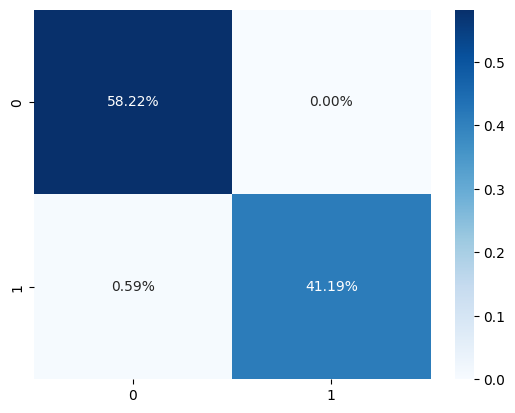

In [34]:
sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues')

#is a normalized confusion matrix. fmt specifies the format with 2 decimal numbers.

### Guardar el modelo

In [35]:
model.save('MLP_11agosto.keras') 

#standardization data haven't been saved. Why?

In [37]:
tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True,
                          rankdir='TB',  dpi=96) #expand_nested=False

#prints the model in a png that represents the architecture of the neural network model

You must install pydot (`pip install pydot`) for `plot_model` to work.
